Hello Data Scientists! This is my first Kaggle notebook in R. Below I analyse, what are different factors which affect the campus placements and some exploratory data analysis.

In summary, I have used two models on the data:

* Logistic Regression - This model checks out what are the significant factors for the placement and also predicts ~90% of time if one gets placed based on these significant factors

* Linear Regression - This model checks out what are the significant factors for the salary and also predicts ~55% of times accurate based on these significant factors 

With that, let us start our analysis by loading the following packages

In [98]:
  library(dplyr)
  library(ggplot2)
  install.packages("corrgram")
  install.packages("corrplot")
  library(corrgram)
  library(corrplot)
  library(tidyr)
  library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Let us load the data into a dataframe

In [99]:
  df <- read.csv("../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
  print(head(df))

  sl_no gender ssc_p   ssc_b hsc_p   hsc_b    hsc_s degree_p  degree_t workex
1     1      M 67.00  Others 91.00  Others Commerce    58.00  Sci&Tech     No
2     2      M 79.33 Central 78.33  Others  Science    77.48  Sci&Tech    Yes
3     3      M 65.00 Central 68.00 Central     Arts    64.00 Comm&Mgmt     No
4     4      M 56.00 Central 52.00 Central  Science    52.00  Sci&Tech     No
5     5      M 85.80 Central 73.60 Central Commerce    73.30 Comm&Mgmt     No
6     6      M 55.00  Others 49.80  Others  Science    67.25  Sci&Tech    Yes
  etest_p specialisation mba_p     status salary
1    55.0         Mkt&HR 58.80     Placed 270000
2    86.5        Mkt&Fin 66.28     Placed 200000
3    75.0        Mkt&Fin 57.80     Placed 250000
4    66.0         Mkt&HR 59.43 Not Placed     NA
5    96.8        Mkt&Fin 55.50     Placed 425000
6    55.0        Mkt&Fin 51.58 Not Placed     NA


Let us quickly analyse the structure of data

In [100]:
print(str(df))

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int

From above, we can see R has nicely assigned the observations in the columns accordingly. For example, gender, ssc_b, hsc_b, hsc_s and all those which have categorical data are factorized. This is what we want to also. Sometimes, some columns may not be assigned properly. In such cases, we should manualy factorize them.

First of all, let us check if there are Null values ("NA") in each of the column

In [101]:
stack(sapply(df, function(x) sum(is.na(x))))

values,ind
<int>,<fct>
0,sl_no
0,gender
0,ssc_p
0,ssc_b
0,hsc_p
0,hsc_b
0,hsc_s
0,degree_p
0,degree_t


Only salary column has some missing values. Let us find counts of unique elements in each columns using dplyr function

In [102]:

stack(df %>% summarise_all(n_distinct))

values,ind
<int>,<fct>
215,sl_no
2,gender
103,ssc_p
2,ssc_b
97,hsc_p
2,hsc_b
3,hsc_s
89,degree_p
3,degree_t


From the looks of it, NA's in the salary column is due to candidate not being 'placed' in status. Let us quickly check if the NA are present only for the "Not placed" records

In [103]:
# All the "Not Placed" candidates have no salary information
head(df %>% filter(grepl("Not Placed",status)))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,4,M,56,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NA
2,6,M,55,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NA
3,7,F,46,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NA
4,10,M,58,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NA
5,13,F,47,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NA
6,15,M,62,Central,47.0,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,NA


In [104]:
# All the "Placed" have salary information
head(df %>% filter(!grepl("Not Placed",status)))

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000
5,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000
6,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000


Ok. Let us correlation analysis on numerical columns  for the records who are placed

In [105]:
# Grab only numeric only columns who are placed
num.cols <- sapply(df,is.numeric)
head(df[,num.cols])

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,67.00,91.00,58.00,55.0,58.80,270000
2,2,79.33,78.33,77.48,86.5,66.28,200000
3,3,65.00,68.00,64.00,75.0,57.80,250000
4,4,56.00,52.00,52.00,66.0,59.43,NA
5,5,85.80,73.60,73.30,96.8,55.50,425000
6,6,55.00,49.80,67.25,55.0,51.58,NA


Only the above columns have numerical data, so filtering the dataframe to select those columns

In [106]:
# Excluding the records without salary information
placed <- df %>% filter(salary != 'NA') %>% 
select(sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary)

# Correlation between the columns
cor.data <- cor(placed)
print(cor.data)

               sl_no       ssc_p       hsc_p    degree_p    etest_p       mba_p
sl_no     1.00000000 -0.09347968 -0.21842843 -0.10224982 0.04146745 -0.07243202
ssc_p    -0.09347968  1.00000000  0.29341586  0.38065683 0.31789178  0.43055982
hsc_p    -0.21842843  0.29341586  1.00000000  0.22130692 0.28467174  0.32998281
degree_p -0.10224982  0.38065683  0.22130692  1.00000000 0.21768312  0.49409291
etest_p   0.04146745  0.31789178  0.28467174  0.21768312 1.00000000  0.28414332
mba_p    -0.07243202  0.43055982  0.32998281  0.49409291 0.28414332  1.00000000
salary    0.06376351  0.03533034  0.07681903 -0.01927223 0.17830731  0.17501294
              salary
sl_no     0.06376351
ssc_p     0.03533034
hsc_p     0.07681903
degree_p -0.01927223
etest_p   0.17830731
mba_p     0.17501294
salary    1.00000000


Lets plot the correlation between samples using "corrplot" function

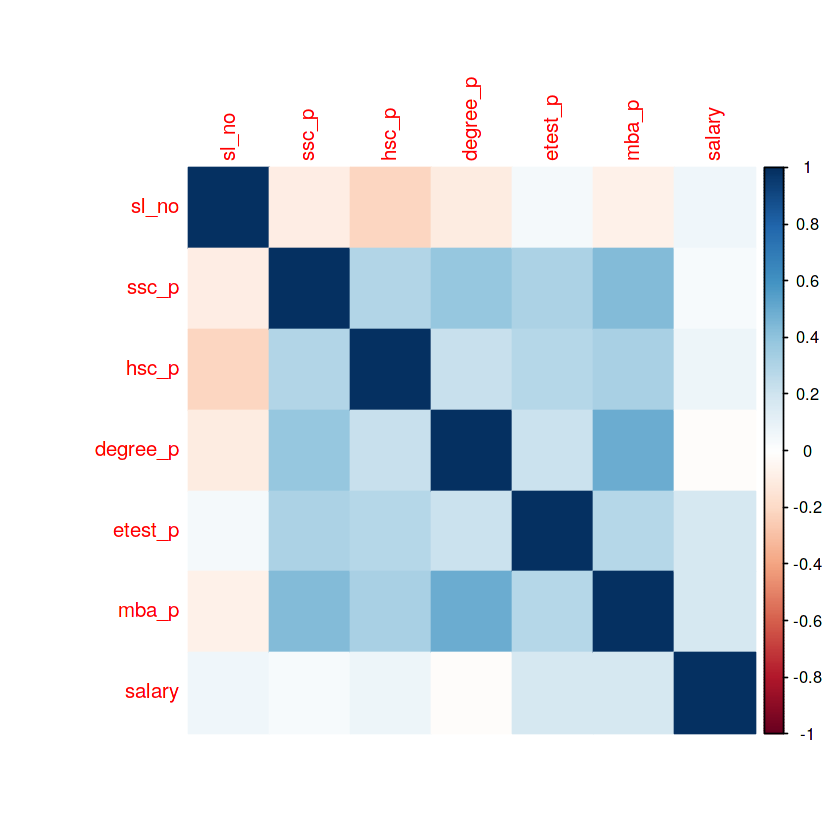

In [107]:
corrplot(cor.data,method='color')

Lets plot the correlation between samples using "corrplot" function

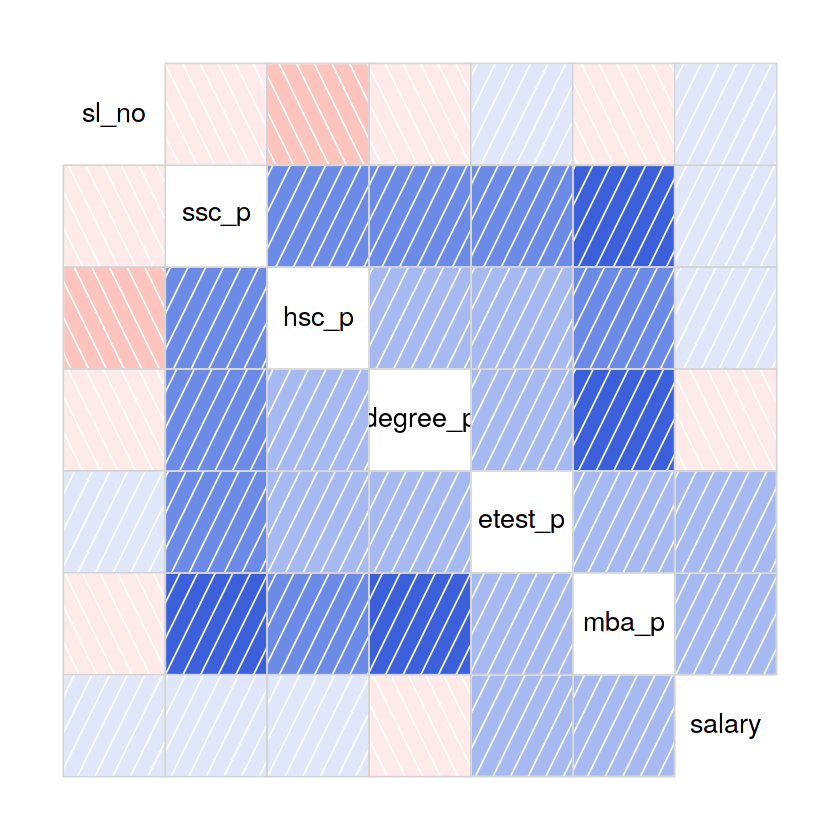

In [108]:
corrgram(placed)

We can understand from the above plot that for those who are placed, the college grades at different levels from ssc till mba have some correlation.

Salary has some correlation with etest_p and mba_p. 

Let us plot the correlation plot for the whole dataset which includes both Placed and Not Placed

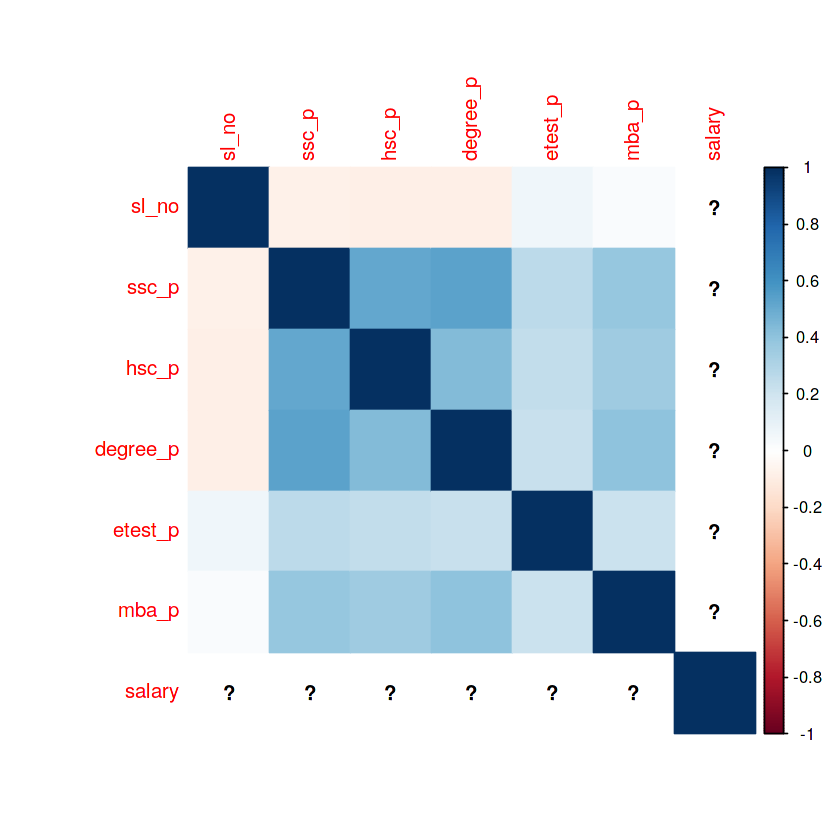

In [109]:
#Using all the records
all_records <- df %>% 
  select(sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary)

# Correlation between the columns
cor.data <- cor(all_records)
#print(cor.data)

corrplot(cor.data,method='color')

May be because, we included all the records and Not Placed records have no salary information, we are not getting proper correlation plot. Let us fix it by replacing NA in the salary column with "O"

In [110]:
head(df %>% select(status,salary))

,status,salary
,<fct>,<int>
1,Placed,270000
2,Placed,200000
3,Placed,250000
4,Not Placed,NA
5,Placed,425000
6,Not Placed,NA


In [111]:
# Replacing NA with 0 in salary column
df$salary[is.na(df$salary)] <- 0
head(df %>% select(status,salary))

,status,salary
,<fct>,<dbl>
1,Placed,270000
2,Placed,200000
3,Placed,250000
4,Not Placed,0
5,Placed,425000
6,Not Placed,0


Let replot the correlation again

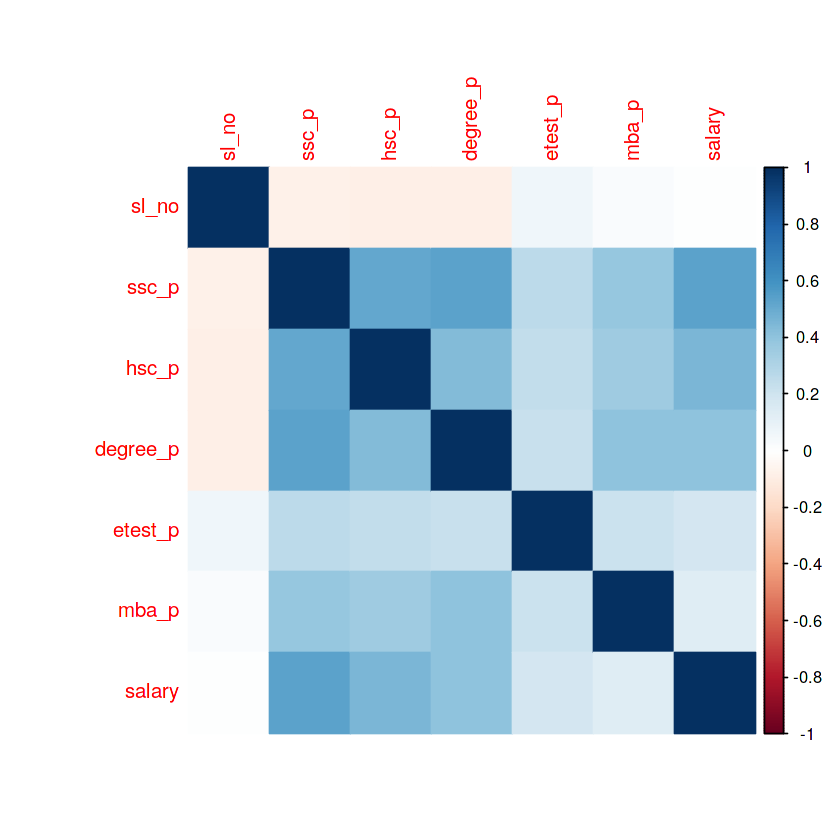

In [112]:
#Using all the records
all_records <- df %>% 
  select(sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary)

# Correlation between the columns
cor.data <- cor(all_records)
#print(cor.data)

corrplot(cor.data,method='color')

It is fixed now! Overall, salary seems to have some correlation with ssc_p,hsc_p, degree_p

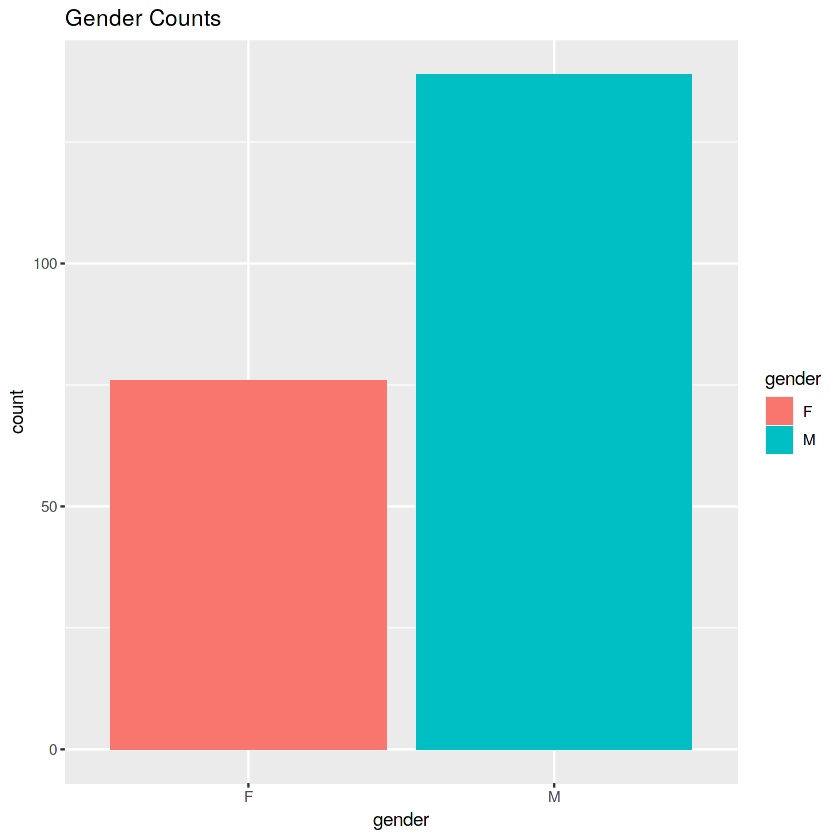

In [113]:
# What are the counts of gender?
ggplot(df,aes(gender)) + geom_bar(aes(fill=gender)) +
  ggtitle("Gender Counts") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))

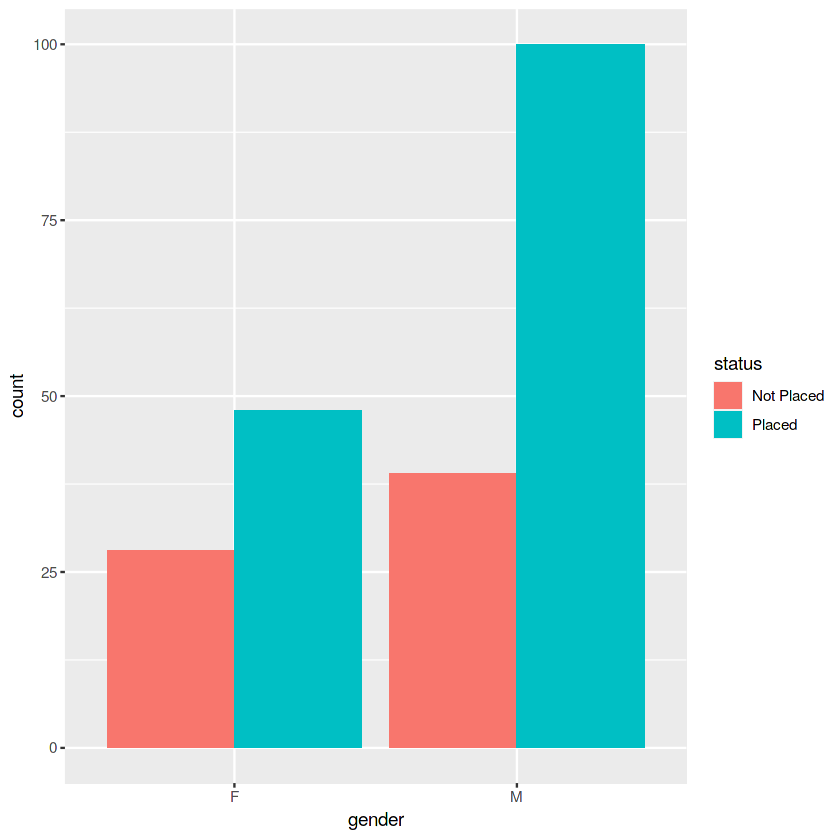

In [114]:
# What percentage of M and F got placed, how many not placed?
ggplot(df, aes(gender, ..count..)) + geom_bar(aes(fill = status), position = "dodge")

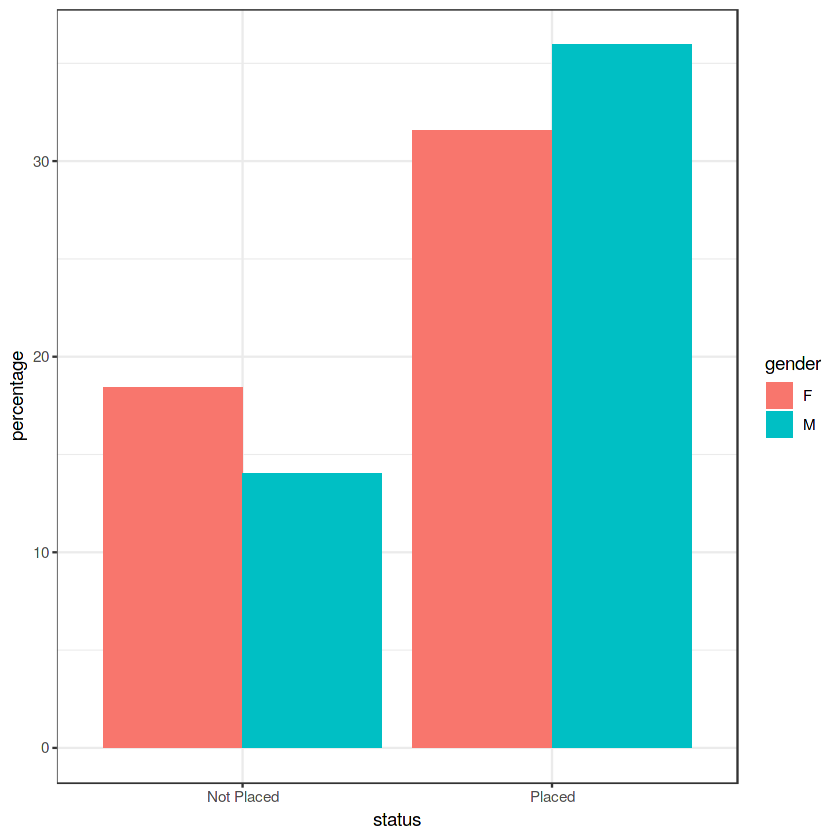

In [115]:
df2 <- df %>% 
  group_by(gender,status) %>% 
  tally() %>% 
  complete(gender, fill = list(n = 0)) %>% 
  mutate(percentage = n / sum(n) * 100)

## What is the percentage of the genders in placed and not placed?

ggplot(df2, aes(status, percentage, fill = gender)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

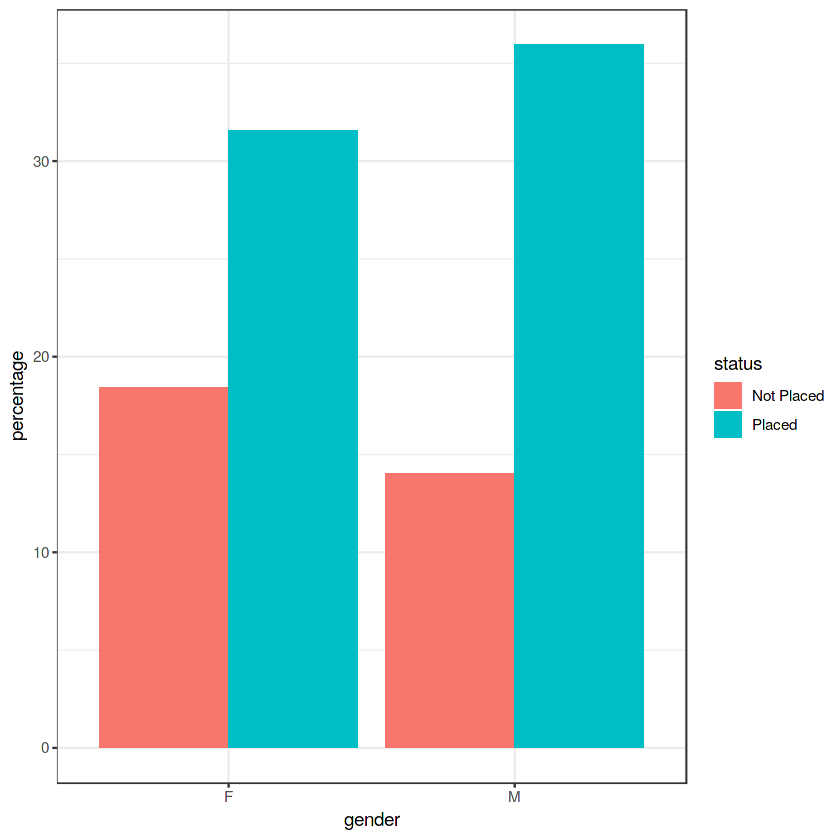

In [116]:
## What is the percentage of those who got placed and not placed in genders?
ggplot(df2, aes(gender, percentage, fill = status)) + 
  geom_bar(stat = 'identity', position = 'dodge') +
  theme_bw()

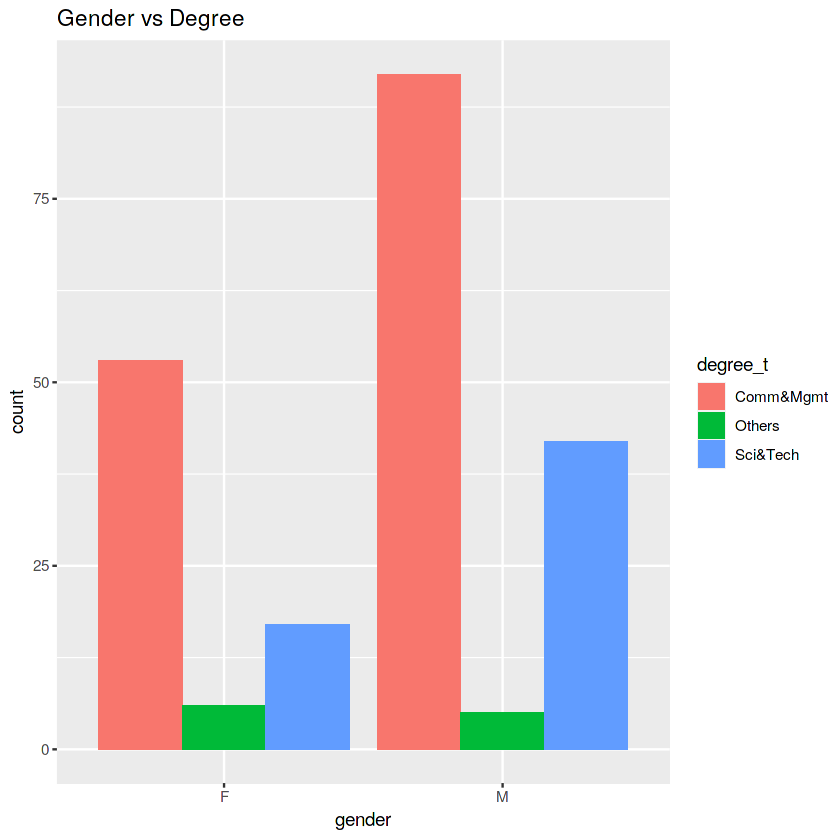

In [117]:
# What degree did most of Males and Females undertook?
ggplot(df,aes(gender)) + geom_bar(aes(fill=degree_t), position = 'dodge') +
  ggtitle("Gender vs Degree") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))


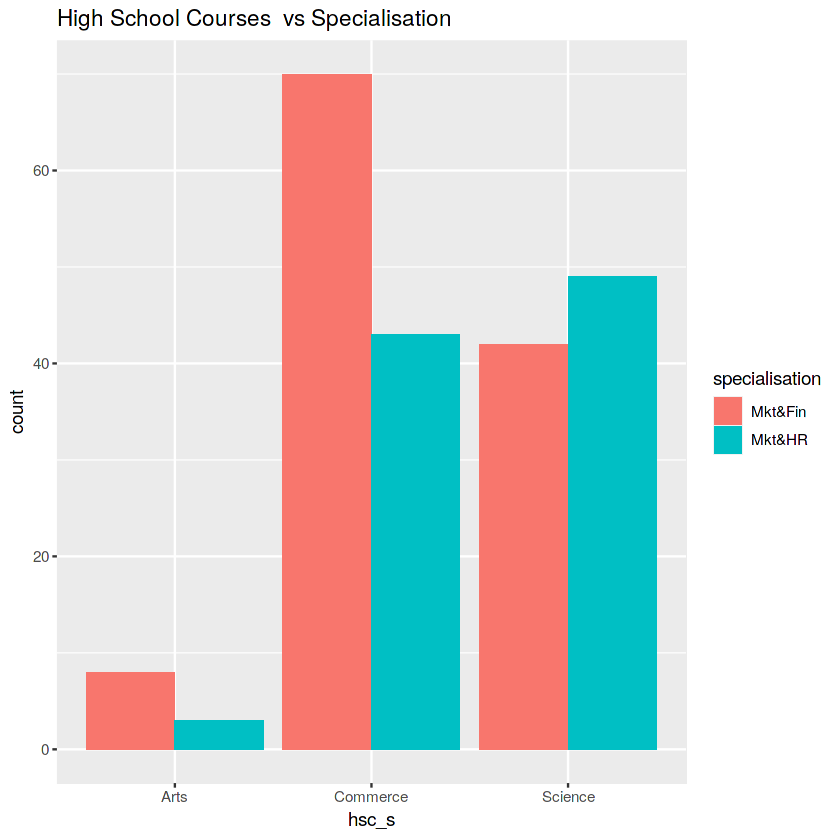

In [118]:
# High School Courses vs Specialization
ggplot(df,aes(hsc_s)) + geom_bar(aes(fill=specialisation), position = 'dodge') + 
ggtitle("High School Courses  vs Specialisation") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))

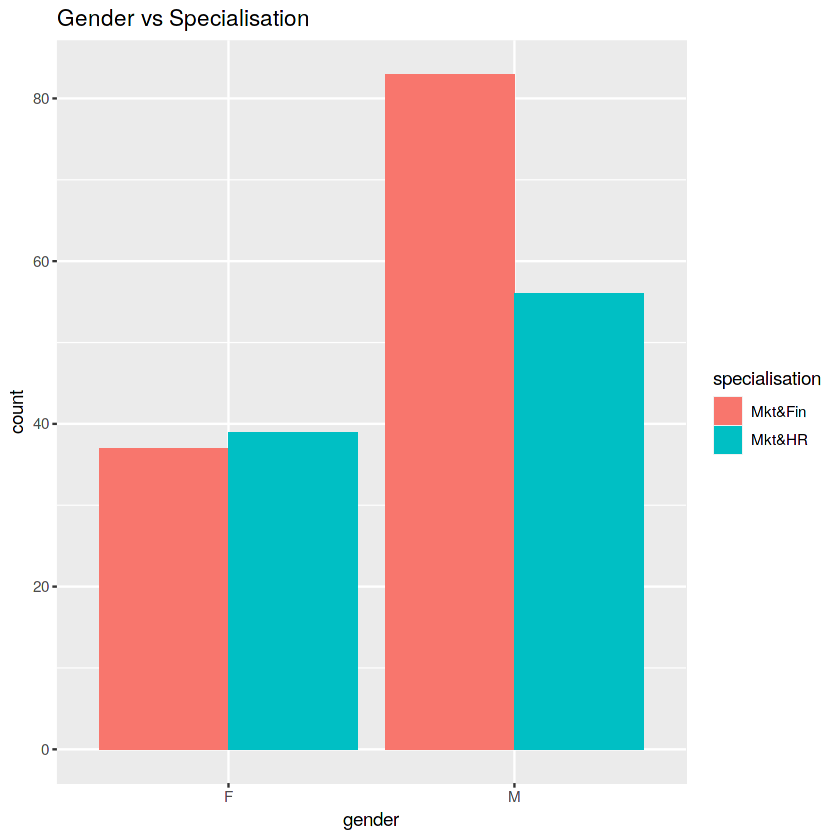

In [119]:
# What Specialization did most of Males and Females undertook?
ggplot(df,aes(gender)) + geom_bar(aes(fill=specialisation), position = 'dodge') +
  ggtitle("Gender vs Specialisation") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))

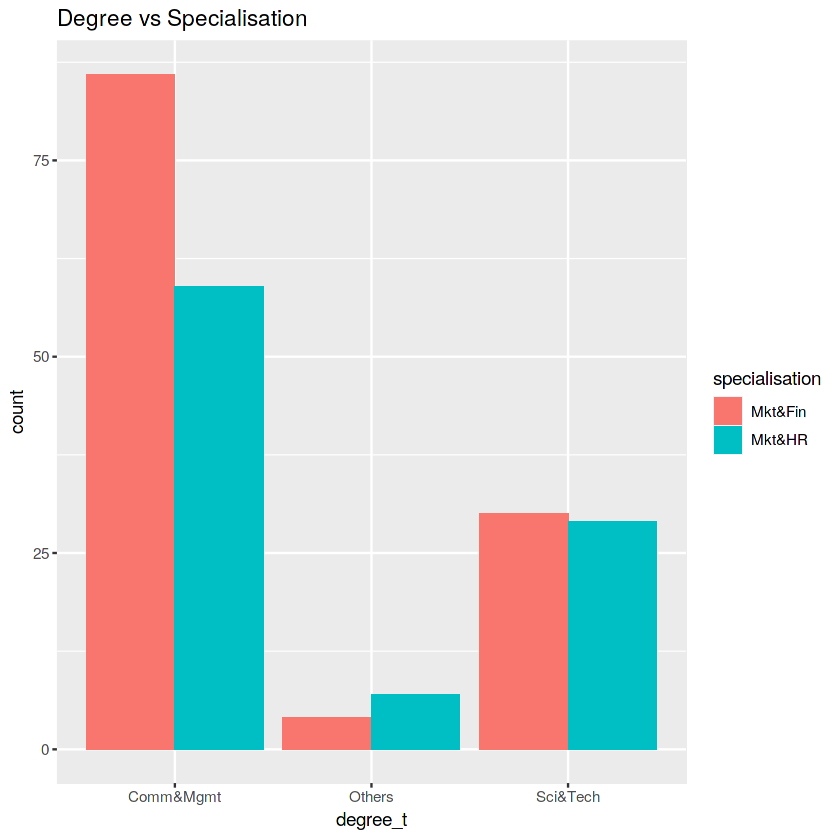

In [120]:
# Degree vs Specialization
ggplot(df,aes(degree_t)) + geom_bar(aes(fill=specialisation), position = 'dodge') +
ggtitle("Degree vs Specialisation") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))

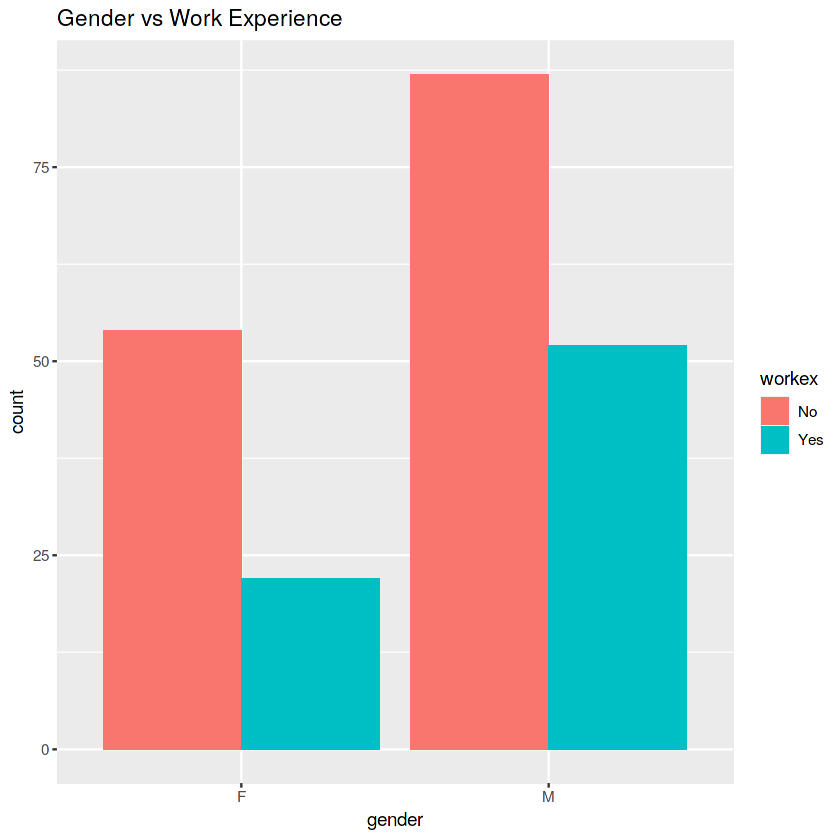

In [121]:
# Whether  Males and Females have work experience?
ggplot(df,aes(gender)) + geom_bar(aes(fill=workex), position = 'dodge') +
  ggtitle("Gender vs Work Experience") #+ theme(axis.text.x  = element_text(angle=90, hjust = 1))

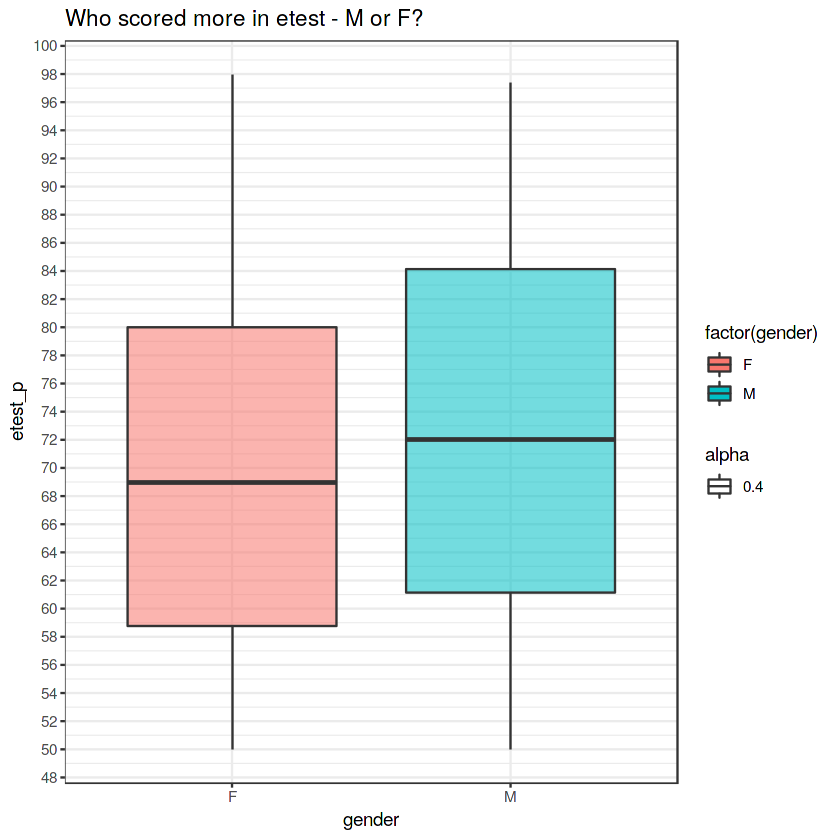

In [122]:
# Who scored more in etest ? M or F?

pl1 <-  ggplot(df,aes(gender,etest_p))
pl1 <-  pl1 + geom_boxplot(aes(group=gender,fill=factor(gender),alpha=0.4))
pl1 <- pl1  + scale_y_continuous(breaks = seq(min(0),max(100),by=2)) +
  ggtitle("Who scored more in etest - M or F?") + theme_bw()
pl1

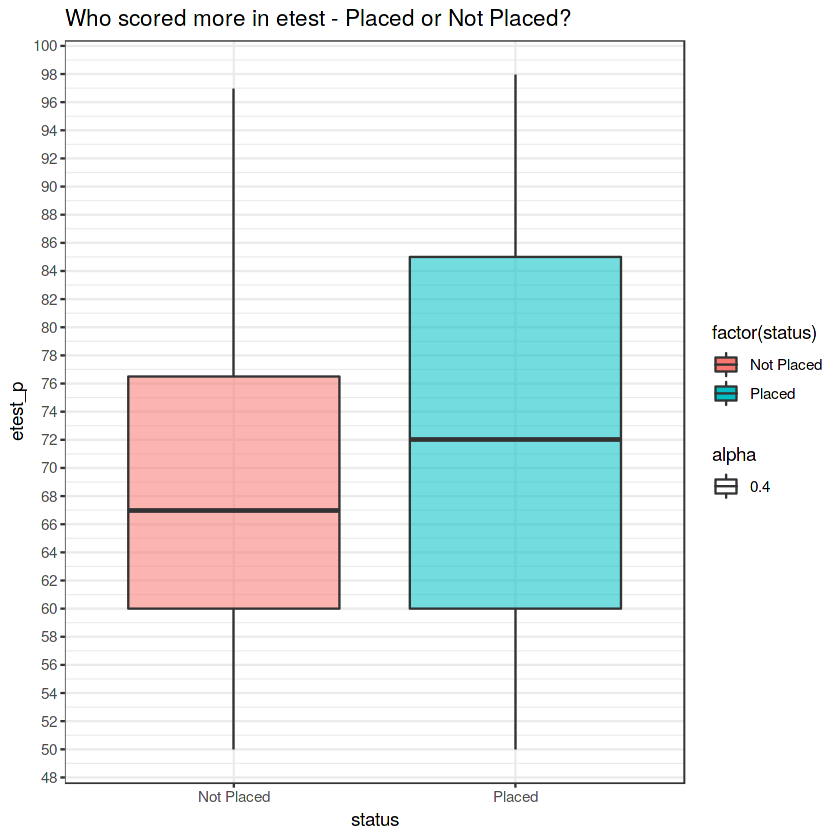

In [123]:
# Who scored more in etest ? placed or not placed?

pl2 <-  ggplot(df,aes(status,etest_p))
pl2 <-  pl2 + geom_boxplot(aes(group=status,fill=factor(status),alpha=0.4))
pl2 <- pl2 + scale_y_continuous(breaks = seq(min(0),max(100),by=2)) + ggtitle("Who scored more in etest - Placed or Not Placed?") + theme_bw()
pl2

We can still mine the dataset. But, the more intresting part is to create and model to do prediction and accuracy. Let us start with logistic regression model first. Logistic regression model is used on categorical values to predict "binary variables". Using the model we calculate the probabilities and if probabilities > 0.5, we assign the condition that we are predicting. 

In [124]:
# We load caTools to split the train and test data

set.seed(101)

split <- sample.split(df$status,SplitRatio = 0.7)

final.train <- subset(df,split ==TRUE)
#head(final.train)
final.test <-  subset(df,split ==FALSE)

Our research question now is: Given different factors from school to degree, specialization, etest what are the significant factors which affect the placement of a candidate? 

We will not use salary information from the data a this point because is not very useful in predicting the placement of a student. Only after the placement, a candidate is given a salary.

In [125]:
final.log.model <- glm(status ~. - salary, data = final.train, family = "binomial"(link = logit))
summary(final.log.model)


Call:
glm(formula = status ~ . - salary, family = binomial(link = logit), 
    data = final.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.20730  -0.14362   0.05572   0.35014   2.14623  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -16.876973   6.431872  -2.624 0.008691 ** 
sl_no                  0.009581   0.005550   1.726 0.084311 .  
genderM                0.577623   0.791943   0.729 0.465773    
ssc_p                  0.233139   0.057049   4.087 4.38e-05 ***
ssc_bOthers           -0.012675   0.879281  -0.014 0.988499    
hsc_p                  0.110715   0.047217   2.345 0.019038 *  
hsc_bOthers            0.700737   0.921698   0.760 0.447095    
hsc_sCommerce         -1.008305   1.289728  -0.782 0.434334    
hsc_sScience          -1.298479   1.510861  -0.859 0.390103    
degree_p               0.161371   0.073496   2.196 0.028116 *  
degree_tOthers        -1.666636   1.737906  -0.959 0.3375

From above, we can see ssc_p, hsc_p, mba_p, degree_p workexYes have significant effect on the placement status. It is quite interesting that etest_p and specialisationMkt&HR is not so significant. And truly, the placement is not gender biased.

Ok. Now that we have a model, let us predict our model using our test data to find out if it can predict the placement status given the data.

In [126]:
# Prediction
fitted.probabilities <- predict(final.log.model, final.test,type='response')

# Calculate probabilities of the placement status, 
# If Probability > 0.5, predicted as Placed (1) else Not Placed (0)

fitted.results <- ifelse(fitted.probabilities>0.5,1,0)

# fitted.results contains predicted probabilities

# Creating another column in the test data to assign if "Placed" then 1 else 0
final.test <- final.test %>% mutate(status_binary = ifelse(status == "Placed", 1,0))


Now let us find the Accuracy of the model.

In [127]:
# Find the misclassification by comparing the fitted

misClassError <- mean(fitted.results != final.test$status_binary)
print(paste0("Misclassification of the logistic regression model is : ",misClassError))
print(paste0("Accuracy of the logistic regression model is : ",1- misClassError))


[1] "Misclassification of the logistic regression model is : 0.09375"
[1] "Accuracy of the logistic regression model is : 0.90625"


let us create a confusion matrix

In [128]:
# Create confusion matrix
table(final.test$status,fitted.probabilities>0.5)

            
             FALSE TRUE
  Not Placed    16    4
  Placed         2   42

So, given the observation the model accurately predicts ~90% of the times, whether a candidate is Placed or Not Placed. 

According to confusion matrix, our model has predicted 2 candidates are "Not Placed" although they are "Placed" and 4 candidates as "Placed" alhtough they are "Not Placed"